In [217]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
time = 'late'
if (time == 'late'):
    print(1)

1


In [ ]:
df=pd.read_csv('data_cleaned.csv')


In [18]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [10]:
!pip install graphviz

In [12]:
!pip install tensorflow

  Retrying (Retry(total=4, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000218901816D8>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/tensorflow/
  Retrying (Retry(total=3, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x00000218901815C0>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/tensorflow/
  Retrying (Retry(total=2, connect=None, read=None, redirect=None, status=None)) after connection broken by 'NewConnectionError('<pip._vendor.urllib3.connection.VerifiedHTTPSConnection object at 0x0000021890181A90>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed')': /simple/tensorflow/
  Retrying (Retry(total=1, connect=None, read=None, redirect=None, 

In [15]:
from sklearn.model_selection import train_test_split as tt


In [16]:
train_x,val_x,train_y,val_y=tt(x,y,random_state=101,stratify=y)

In [34]:
train_y.value_counts(normalize=True)

0    0.616766
1    0.383234
Name: Survived, dtype: float64

In [37]:
val_y.value_counts(normalize=True)

0    0.61435
1    0.38565
Name: Survived, dtype: float64

In [44]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import DecisionTreeRegressor

In [47]:
dd=DecisionTreeClassifier(random_state=10)
dd.fit(train_x,train_y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')

In [52]:
dd.score(train_x,train_y)

0.9880239520958084

In [54]:
dd.score(val_x,val_y)

0.7533632286995515

In [59]:
dd.predict(val_x)

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0], dtype=int64)

In [65]:
c=dd.predict_proba(val_x)
c

array([[0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.5       , 0.5       ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [1.

In [126]:
y_val=c[:,1]
xx=[]
yy=[]
for i in range(len(y_val)):
    if y_val[i]>0.7:
        xx.append(1)
    else:
        xx.append(0)

        
        
    
    

In [127]:
from sklearn.metrics import accuracy_score as ac
ac(xx,val_y)


0.7533632286995515

In [132]:
tra=[]
vald=[]
for i in range(1,10):
    dd=DecisionTreeClassifier(max_depth=i,random_state=10)
    dd.fit(train_x,train_y)
    tra.append(dd.score(train_x,train_y))
    vald.append(dd.score(val_x,val_y))

In [138]:
a=pd.DataFrame({'max depth':range(1,10),'train_score':tra,'validation_score':vald})
a

,max depth,train_score,validation_score
0,1,0.803892,0.735426
1,2,0.803892,0.735426
2,3,0.830838,0.766816
3,4,0.847305,0.771300
4,5,0.847305,0.771300
5,6,0.863772,0.775785
6,7,0.889222,0.780269
7,8,0.911677,0.784753
8,9,0.931138,0.775785


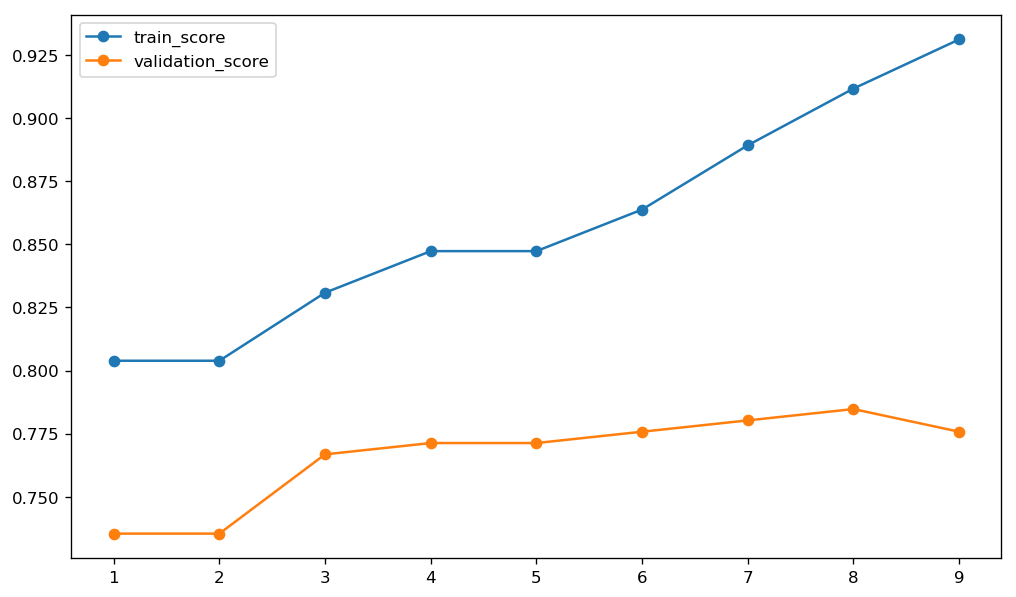

In [145]:
plt.figure(figsize=(10,6),dpi=120,facecolor='w',edgecolor='r')
plt.plot(a['max depth'],a['train_score'],marker='o')
plt.plot(a['max depth'],a['validation_score'],marker='o')
plt.legend()

In [167]:
dd=DecisionTreeClassifier(max_depth=8,max_leaf_nodes=25,random_state=10)

In [168]:
dd.fit(train_x,train_y)
dd.score(train_x,train_y)


0.8802395209580839

In [170]:
dd.score(val_x,val_y)

0.8161434977578476

In [232]:
from sklearn import tree


In [233]:
decision_tree = tree.export_graphviz(dd,out_file='ttt.dot',feature_names=train_x.columns,max_depth=2,filled=True)


In [234]:
!dot -Tpng tree.dot -o ttt.png

'dot' is not recognized as an internal or external command,
operable program or batch file.


In [235]:
image = plt.imread('ttt.dot')
plt.figure(figsize=(15,15))
plt.imshow(image)

OSError: cannot identify image file 'ttt.dot'